In [2]:
%matplotlib Widget

import sampling
import modeling

import importlib
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Text(0, 0.5, 'Probability')

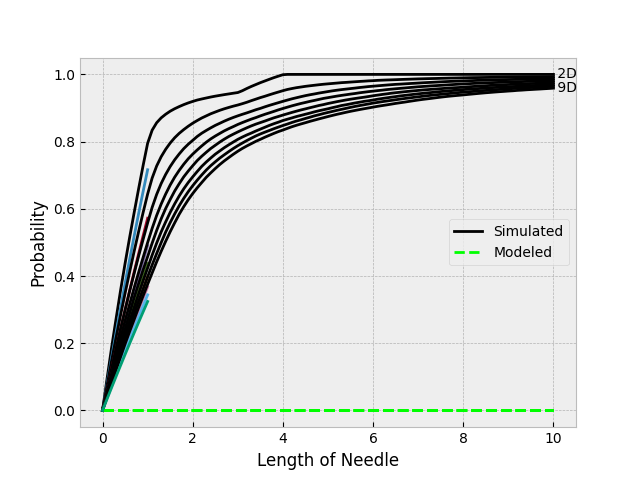

In [54]:
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 10, 1)
lengths = np.linspace(0, 10, 101)
hyperplanes = 2
spacing = np.arange(hyperplanes) + 1
spacing = np.array([1, 4])
c = 1

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):

    xs = np.random.random((samples, dim))
    hypersphere = sampling.get_samples_gaussian(samples, dim)
    sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
    # sim_probs = sampling.get_sim_prob_e(samples, dim, lengths, c, hyperplanes, spacing)

    ax.plot(lengths, sim_probs, "k")

    probabilities = modeling.prob_of_crossing_vs_length(lengths, dim, c, hyperplanes, spacing)
    ax.plot(lengths, probabilities, "--", color=(0,1,0))

    r_ml = lengths[lengths<=min(spacing)]
    if dim%2 == 0:
        modeled_prob_m = r_ml/spacing[0]/np.pi*spec.beta(dim/2, 0.5) + r_ml/spacing[1]/np.pi*spec.beta(dim/2, 0.5) - 2*r_ml**2/np.pi/dim/spacing[0]/spacing[1]
    else:
        modeled_prob_m = r_ml/spacing[0]/np.pi*spec.beta(dim/2, 0.5) + r_ml/spacing[1]/np.pi*spec.beta(dim/2, 0.5) - 2*r_ml**2/np.pi/dim/spacing[0]/spacing[1]
    ax.plot(r_ml, modeled_prob_m)

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
    # ax.plot(lengths[lengths<1], lengths[lengths<1]*spec.gamma(dim/2)/spec.gamma(0.5)/spec.gamma(dim/2+0.5))
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
# ax.set_title("Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions")


In [65]:
# multi-spacing debug
dim = 3
hyperplanes = 2
spacing = np.array([1,3])
length = 3

xs = np.random.random((samples, dim))
hypersphere = sampling.get_samples_gaussian(samples, dim)
ys = xs + length * hypersphere

intersections = 0
for y in ys:
    if np.abs(y[0])>spacing[0] or np.abs(y[1])>spacing[1]:
        intersections += 1
probability = intersections / samples
print(probability)

print(sampling.get_sim_prob_ge(samples, 3, np.array([3]), 1, 2, spacing))

0.71631
[0.93612]


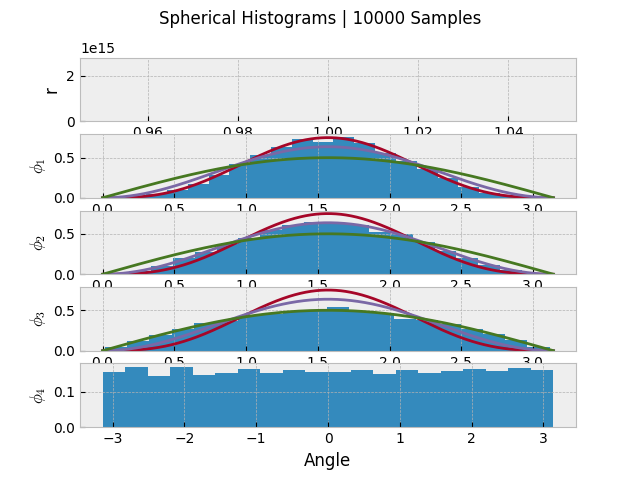

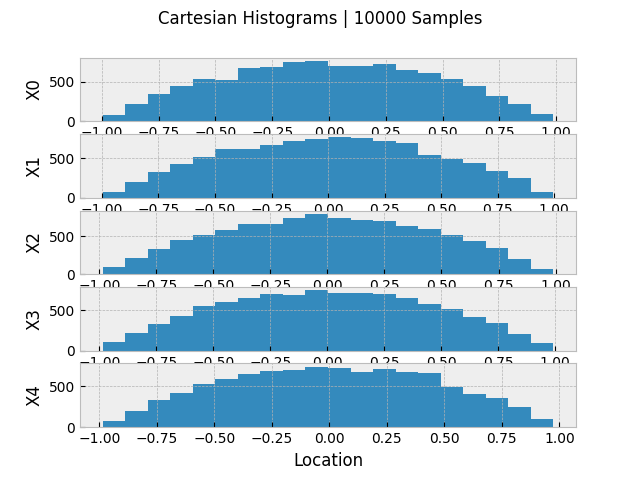

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)